Представьте, что у нас небольшой магазин, туда приходят покупатели, делают покупки и мы можем посчитать их средний чек за день. Также допустим у нас покупатели закупаются раз в 10 дней из-за выгодных предложений. У нас есть исторические данные - user_id, metric, day. metric - cредний чек покупателя, user_id - айдишник покупателя, day - день в прошлом месяце. У нас 10к покупателей, которые были у нас в магазине 2 раза. Мы построили модель, повышающую средний чек у покупателей, и теперь хотим проверить, как она работает. Для этого нам надо правильно спланировать А/Б тест. Данные - 'df_hw.csv'.

Задание:

1) Подобрать дизайн корректного А/Б теста на исторических данных

2) Можно ли статистически значимо задетектить эффект в 2%

3) За какую длительность теста?

4) Как сделать так чтобы хватало 3 дней на тест?

**Выполненные задания ниже**

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd
#import seaborn as sns
from sklearn.utils import shuffle

In [ ]:
df_all = pd.read_csv('df_hw.csv', index_col = 0)

In [ ]:
# https://github.com/irsafilo/HW_AB_tesing/blob/main/data/df_hw.csv

In [ ]:
df_all.head()

,user_id,metric,day
4768,4768,5210.050500,8
1928,1928,1617.534800,8
2995,2995,6742.954000,5
15885,5885,8998.112105,15
6121,6121,2281.206200,1


In [ ]:
metric_train = df_all[df_all['day'] < 10].sort_values(by = ['user_id', 'day'])['metric'].values
metric_valid = df_all[df_all['day'] >= 10].sort_values(by = ['user_id', 'day'])['metric'].values

In [ ]:
inds = [i for i in range(len(metric_train))]

In [ ]:
def plot_hist(x):
    plt.figure(figsize=(7,7))
    plt.hist(x, bins = 100, color='red',  linewidth=2)
    plt.title('Гистограмма средней денежной метрики')
    plt.ylabel('Количество')
    plt.show()

In [ ]:
metric_all = metric_train + metric_valid

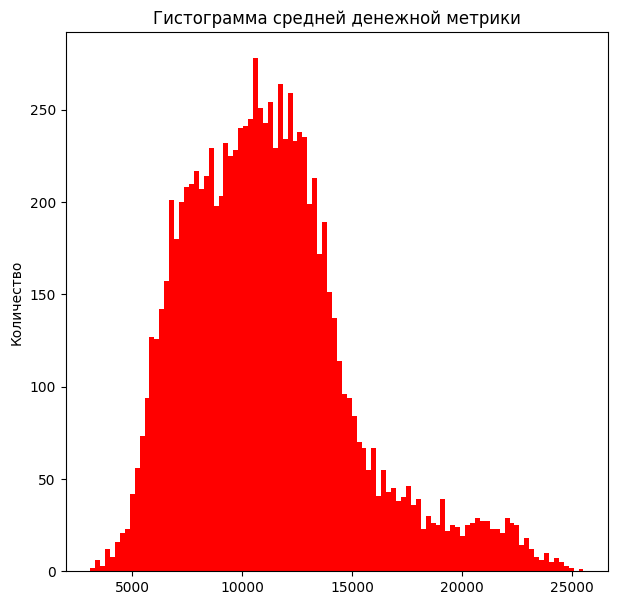

In [ ]:
plot_hist(metric_all)

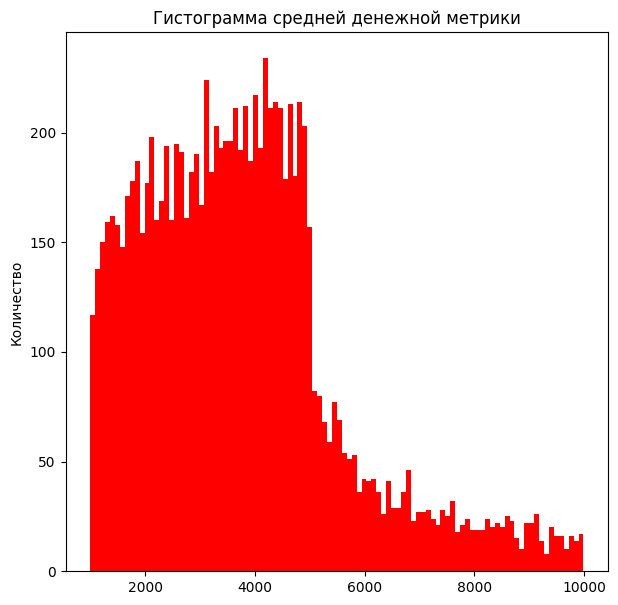

In [ ]:
plot_hist(metric_train)

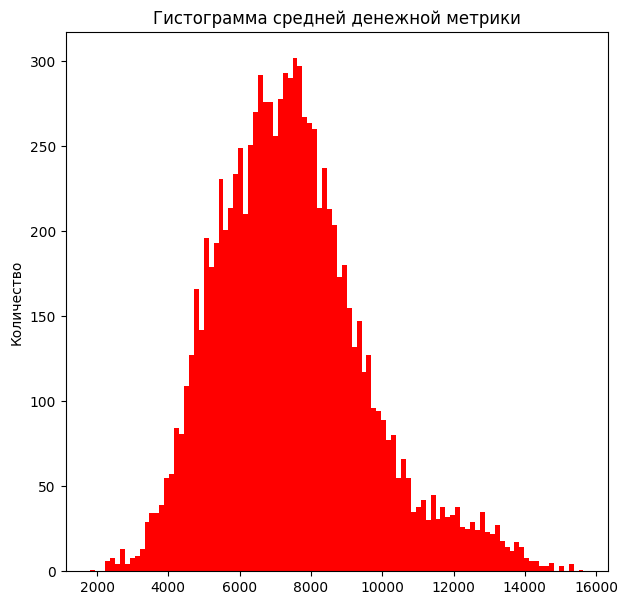

In [ ]:
plot_hist(metric_valid)

In [ ]:
iters = 1000
p_value = []
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    p = scipy.stats.ttest_ind(valid_A, valid_B).pvalue
    p_value.append(p)

0.045

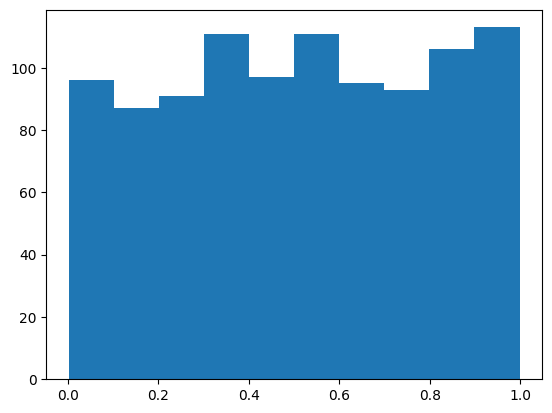

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.02759288446582356, pvalue=0.4241180730069245, statistic_location=0.26159288446582357, statistic_sign=-1)

In [ ]:
np.mean(metric_valid)

7456.122470084466

In [ ]:
np.std(metric_valid)

2088.205946758756

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    valid_A = valid_A * effect
    p = scipy.stats.ttest_ind(valid_A, valid_B ).pvalue
    p_value.append(p)

0.934

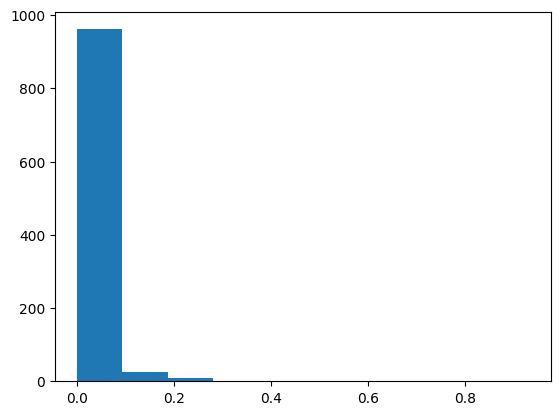

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
metric_train = df_all[df_all['day'].isin([7,8,9])].sort_values(by = ['user_id', 'day'])['metric'].values
metric_valid = df_all[df_all['day'].isin([17,18,19])].sort_values(by = ['user_id', 'day'])['metric'].values

In [ ]:
inds = [i for i in range(len(metric_train))]

In [ ]:
len(inds)

3000

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(inds) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    p = scipy.stats.ttest_ind(valid_A, valid_B ).pvalue
    p_value.append(p)

0.052

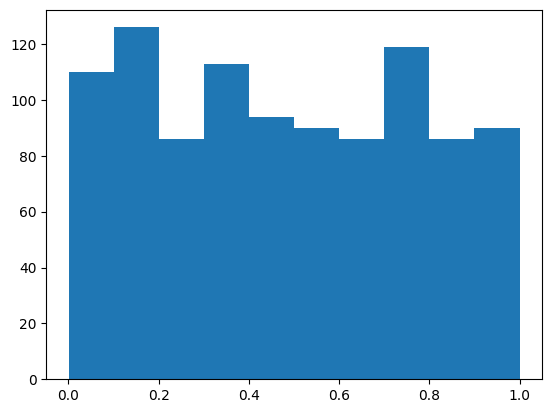

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.038698660013866126, pvalue=0.09746328356591771, statistic_location=0.44830133998613386, statistic_sign=1)

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(inds) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    valid_A = valid_A * effect
    #p = scipy.stats.mannwhitneyu(valid_A_c, valid_B_c ,alternative='two-sided').pvalue
    p = scipy.stats.ttest_ind(valid_A, valid_B).pvalue
    p_value.append(p)

0.509

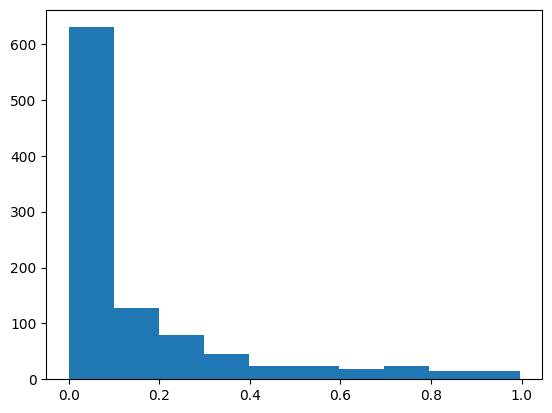

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
mean_cov = np.mean(metric_train)
var_cov = np.var(metric_train)
covariance = np.cov(metric_valid, metric_train)[0][1]
theta = covariance / var_cov

In [ ]:
train_A[:10]

array([2523.5636, 1314.2747, 7639.501 , 3706.9623, 8954.9329, 4175.9043,
       3737.0622, 5012.775 , 4832.6594, 4928.0666])

In [ ]:
np.std(valid_A[:10])

2055.6463479067565

In [ ]:
metric_valid.shape

(3000,)

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    #p_k2s = scipy.stats.ks_2samp(train_A, train_B).pvalue
    valid_A = valid_A * effect
    valid_A_c = valid_A - (train_A - mean_cov) * theta
    valid_B_c = valid_B - (train_B - mean_cov) * theta
    #p = scipy.stats.mannwhitneyu(valid_A_c, valid_B_c ,alternative='two-sided').pvalue
    p = scipy.stats.ttest_ind(valid_A_c, valid_B_c).pvalue
    p_value.append(p)

0.985

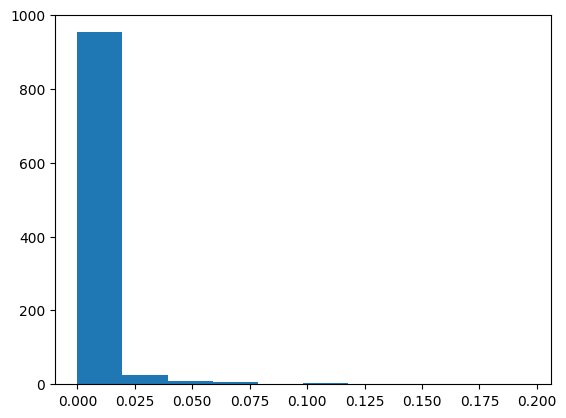

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

Y_predict ~ X * theta [+ X1 * theta2 + X2 * theta, CUPAC, build model linear/NN/boostig, SCORING]
Y_real - Y_predict

+ POSTstratification + rank_transformation


# Задание 1: Подобрать дизайн корректного А/Б теста на исторических данных
**Цель:**
Разделить пользователей на две группы — контрольную и экспериментальную. Контрольная группа останется без изменений, а экспериментальная будет использовать модель, повышающую средний чек.

**Шаги выполнения:**



*   Разделить пользователей случайным образом на две группы. Используется идентификатор пользователя (user_id) для воспроизводимости. Каждая группа содержит равное количество пользователей.
*   Убедиться, что группы сбалансированы по основным характеристикам, например, по среднему чеку или поведению пользователей.
*   Сохранить информацию о принадлежности пользователей к группам в новом столбце таблицы.

In [ ]:
# Разделение пользователей на контрольную и экспериментальную группы
np.random.seed(42)  # Для воспроизводимости
unique_users = df_all['user_id'].unique()
control_users = np.random.choice(unique_users, size=len(unique_users)//2, replace=False)
experiment_users = list(set(unique_users) - set(control_users))

# Назначение групп
df_all['group'] = df_all['user_id'].apply(lambda x: 'control' if x in control_users else 'experiment')

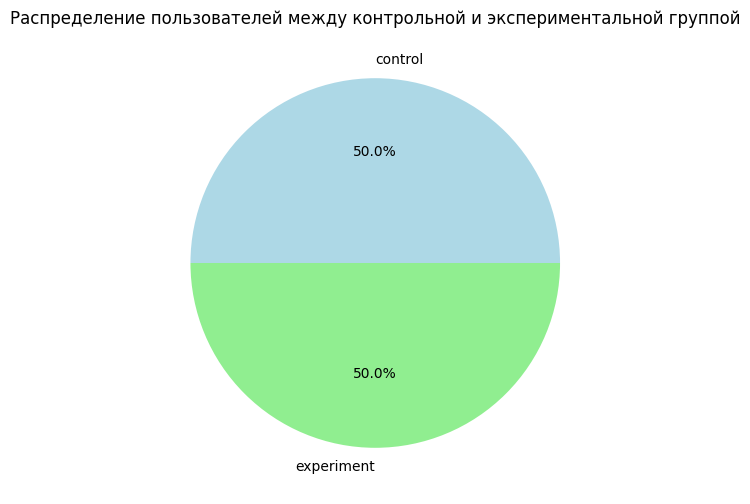

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of users between groups
group_counts = df_all['group'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title("Распределение пользователей между контрольной и экспериментальной группой")
plt.show()

In [ ]:
# Проверка баланса групп по среднему чеку
control_metrics = df_all[df_all['group'] == 'control']['metric']
experiment_metrics = df_all[df_all['group'] == 'experiment']['metric']

# Рассчитаем среднее значение для каждой группы
control_mean = control_metrics.mean()
experiment_mean = experiment_metrics.mean()

# Выводим результаты
print(f"Средний чек в контрольной группе: {control_mean:.2f}")
print(f"Средний чек в экспериментальной группе: {experiment_mean:.2f}")

# Проведение t-теста для проверки баланса
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(control_metrics, experiment_metrics)
print(f"p-value для проверки баланса групп: {p_value:.4f}")

if p_value > 0.05:
    print("Группы сбалансированы по среднему чеку.")
else:
    print("Группы не сбалансированы по среднему чеку.")

Средний чек в контрольной группе: 5600.59
Средний чек в экспериментальной группе: 5616.40
p-value для проверки баланса групп: 0.6784
Группы сбалансированы по среднему чеку.


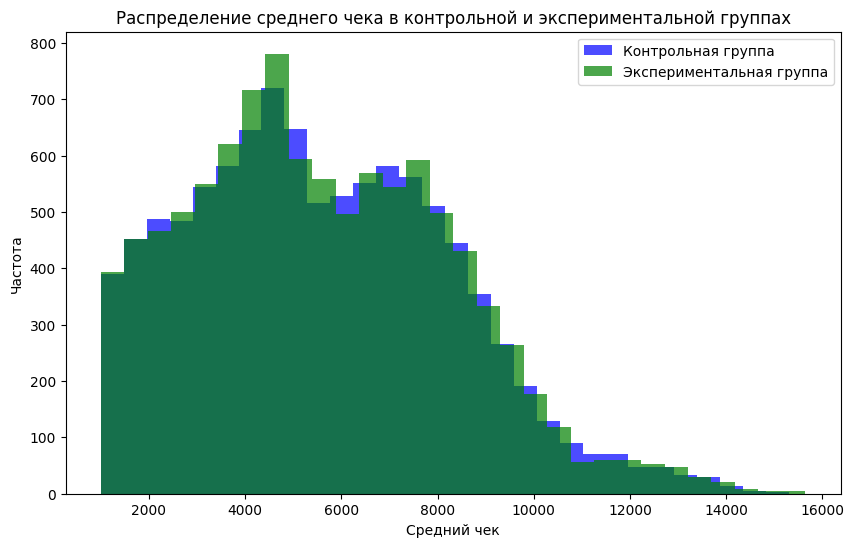

In [ ]:
# Визуализация распределения среднего чека по группам
plt.figure(figsize=(10, 6))
plt.hist(control_metrics, bins=30, alpha=0.7, label="Контрольная группа", color='blue')
plt.hist(experiment_metrics, bins=30, alpha=0.7, label="Экспериментальная группа", color='green')
plt.title("Распределение среднего чека в контрольной и экспериментальной группах")
plt.xlabel("Средний чек")
plt.ylabel("Частота")
plt.legend()
plt.show()

# Задание 2: Можно ли статистически значимо задетектить эффект в 2%
**Цель:** Проверить, можем ли мы обнаружить разницу в среднем чеке, если модель в экспериментальной группе увеличивает его на 2%.

**Шаги выполнения:**
* Рассчитать размер выборки, необходимый для обнаружения эффекта в 2% с мощностью 80% и уровнем значимости 5%.
* Смоделировать увеличение среднего чека в экспериментальной группе на 2%.
* Провести t-тест для проверки статистической значимости различий.

In [ ]:
# Импорт необходимых библиотек
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
import numpy as np

# Параметры теста
alpha = 0.05  # Уровень значимости
power = 0.8  # Мощность теста
effect_size_absolute = 0.02  # Абсолютное увеличение метрики на 2%

# Рассчитываем стандартное отклонение метрики
baseline_std = df_all['metric'].std()  # Стандартное отклонение метрики
baseline_mean = df_all['metric'].mean()  # Среднее значение метрики

# Переводим абсолютный эффект в относительный (Cohen's d)
effect_size = effect_size_absolute / baseline_std  # Нормализуем эффект по стандартному отклонению

# Расчет необходимого размера выборки для каждой группы
sample_size = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f"Необходимый размер выборки для каждой группы: {int(np.ceil(sample_size))}")

# Смоделируем увеличение среднего чека на 2% для экспериментальной группы
experiment_with_effect = df_all[df_all['group'] == 'experiment'].copy()
experiment_with_effect['metric'] *= 1 + effect_size_absolute  # Применяем абсолютное увеличение на 2%

# Получаем метрики для контрольной и экспериментальной групп
control_metrics = df_all[df_all['group'] == 'control']['metric']
experiment_metrics = experiment_with_effect['metric']

# Проведение t-теста для проверки статистической значимости различий
t_stat, p_value = ttest_ind(control_metrics, experiment_metrics)
print(f"p-value t-теста: {p_value:.4f}")

# Интерпретация результата
if p_value < alpha:
    print("Эффект статистически значим (отвергаем нулевую гипотезу).")
else:
    print("Эффект не статистически значим (нулевая гипотеза не отвергнута).")

Необходимый размер выборки для каждой группы: 285024344743
p-value t-теста: 0.0009
Эффект статистически значим (отвергаем нулевую гипотезу).


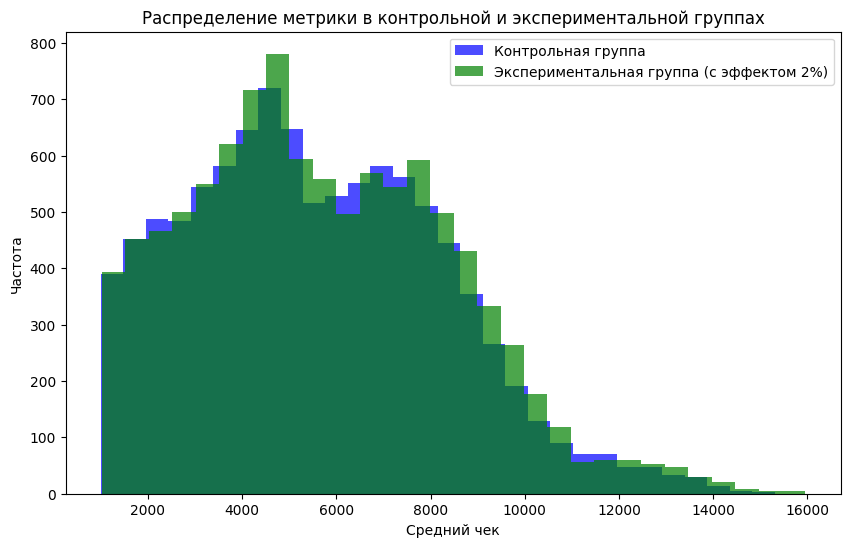

In [ ]:
import matplotlib.pyplot as plt

# Визуализация распределения метрики в контрольной и экспериментальной группах
plt.figure(figsize=(10, 6))
plt.hist(control_metrics, bins=30, alpha=0.7, label="Контрольная группа", color='blue')
plt.hist(experiment_metrics, bins=30, alpha=0.7, label="Экспериментальная группа (с эффектом 2%)", color='green')
plt.title("Распределение метрики в контрольной и экспериментальной группах")
plt.xlabel("Средний чек")
plt.ylabel("Частота")
plt.legend()
plt.show()

# Задание 3: За какую длительность теста?
**Цель:** Оценить, сколько времени потребуется для теста, основываясь на рассчитанном размере выборки и ежедневной посещаемости пользователей.

**Шаги выполнения:**
* Подсчитать количество уникальных пользователей, посещающих магазин ежедневно.
* Разделить необходимый размер выборки на количество ежедневных пользователей, чтобы получить длительность теста.

In [ ]:
import numpy as np

# Расчет базовых метрик
baseline_mean = df_all['metric'].mean()  # Средний чек
baseline_std = df_all['metric'].std()   # Стандартное отклонение чека

# Задаем параметры для А/Б теста
effect_size = 0.02 * baseline_mean  # Эффект в 2% от среднего чека
alpha = 0.05  # Уровень значимости
power = 0.8   # Статистическая мощность

# Расчет необходимого размера выборки с использованием формулы t-теста
from statsmodels.stats.power import tt_ind_solve_power

sample_size_per_group = tt_ind_solve_power(
    effect_size=effect_size / baseline_std,  # Эффект, нормализованный на стандартное отклонение
    alpha=alpha,
    power=power,
    alternative='two-sided'
)

# Оценка длительности теста
visits_per_day = df_all['user_id'].nunique() / 10  # Среднее количество покупателей в день (1/10 от всех покупателей)
test_duration_days = 2 * sample_size_per_group / visits_per_day  # Умножаем на 2 (для контрольной и тестовой групп)

# Вывод результатов
print(f"Средний чек (базовый): {baseline_mean:.2f}")
print(f"Стандартное отклонение: {baseline_std:.2f}")
print(f"Эффект (увеличение на 2%): {effect_size:.2f}")
print(f"Необходимый размер выборки на группу: {sample_size_per_group:.0f}")
print(f"Оценочная длительность теста (в днях): {np.ceil(test_duration_days):.0f}")

Средний чек (базовый): 5628.46
Стандартное отклонение: 2694.72
Эффект (увеличение на 2%): 112.57
Необходимый размер выборки на группу: 8996
Оценочная длительность теста (в днях): 18


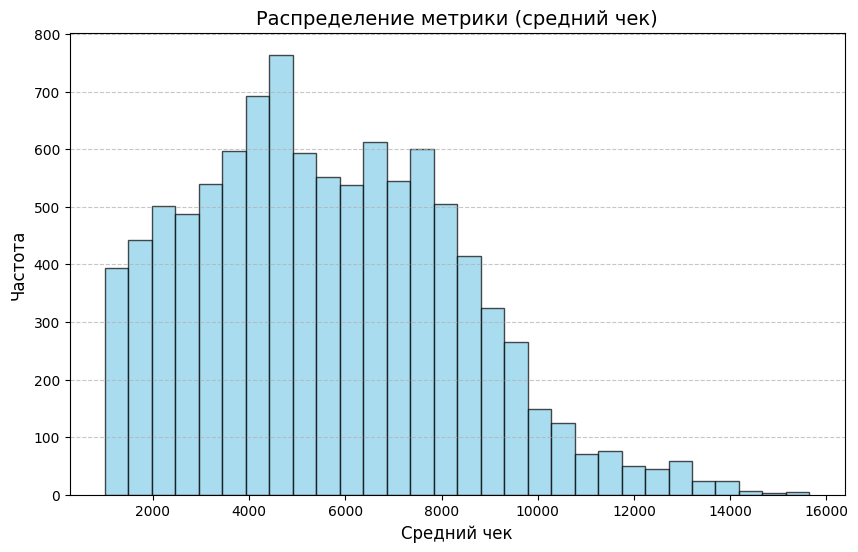

In [ ]:
import matplotlib.pyplot as plt

# Гистограмма распределения метрики
plt.figure(figsize=(10, 6))
plt.hist(df_all['metric'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение метрики (средний чек)", fontsize=14)
plt.xlabel("Средний чек", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

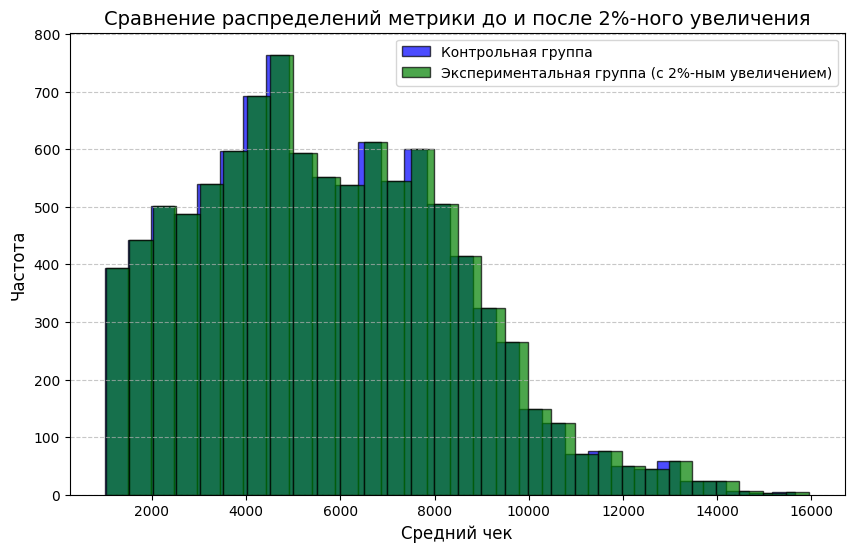

In [ ]:
# Добавим смоделированные данные для экспериментальной группы
df_experiment = df_all.copy()
df_experiment['metric'] *= 1.02  # Увеличение на 2%

# Гистограммы для контрольной и экспериментальной групп
plt.figure(figsize=(10, 6))
plt.hist(df_all['metric'], bins=30, alpha=0.7, label="Контрольная группа", color='blue', edgecolor='black')
plt.hist(df_experiment['metric'], bins=30, alpha=0.7, label="Экспериментальная группа (с 2%-ным увеличением)", color='green', edgecolor='black')
plt.title("Сравнение распределений метрики до и после 2%-ного увеличения", fontsize=14)
plt.xlabel("Средний чек", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

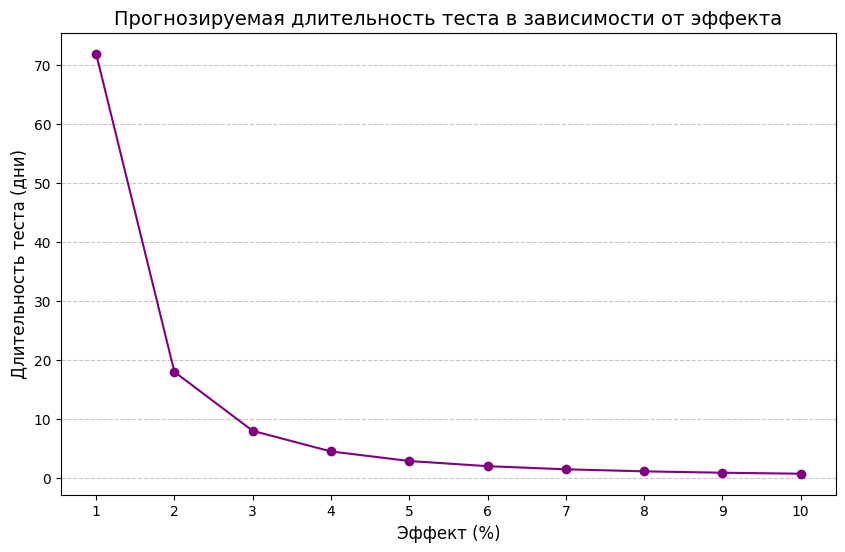

In [ ]:
# Генерируем эффекты от 1% до 10%
effect_sizes = [0.01 * baseline_mean * i for i in range(1, 11)]  # Абсолютный эффект (1%, 2%, ..., 10%)
durations = []

for effect in effect_sizes:
    norm_effect = effect / baseline_std  # Нормализуем эффект
    sample_size = tt_ind_solve_power(
        effect_size=norm_effect, alpha=0.05, power=0.8, alternative='two-sided'
    )
    durations.append(2 * sample_size / visits_per_day)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), durations, marker='o', color='purple')
plt.title("Прогнозируемая длительность теста в зависимости от эффекта", fontsize=14)
plt.xlabel("Эффект (%)", fontsize=12)
plt.ylabel("Длительность теста (дни)", fontsize=12)
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Задание 4: Как сделать так, чтобы хватало 3 дней на тест?
Для того чтобы провести A/B тест за 3 дня, необходимо уменьшить размер выборки, что можно достичь следующими методами:

## 1. Увеличить эффект
Чем больше эффект, тем меньше требуется выборка, а значит, сокращается длительность теста.
Рассчитаем минимальный эффект, при котором длительность теста становится равной или менее 3 дней:

In [ ]:
visits_per_day = len(df_all['user_id'].unique()) / 10  # Среднее количество покупателей в день
target_duration = 3  # Цель: тест за 3 дня
required_effect = None

for effect in np.linspace(0.01, 0.5, 100):  # Проверяем эффекты от 1% до 50%
    norm_effect = (effect * baseline_mean) / baseline_std
    sample_size = tt_ind_solve_power(effect_size=norm_effect, alpha=0.05, power=0.8, alternative='two-sided')
    test_duration_days = 2 * sample_size / visits_per_day
    if test_duration_days <= target_duration:
        required_effect = effect
        break

print(f"Минимальный эффект для теста за 3 дня: {required_effect * 100:.2f}%")

Минимальный эффект для теста за 3 дня: 4.96%


In [ ]:
# Минимальный эффект для теста
effect_size_absolute = 0.0496 * baseline_mean  # 4.96% от среднего чека
effect_size = effect_size_absolute / baseline_std  # Нормализованный эффект (Cohen's d)

# Расчёт размера выборки
sample_size = tt_ind_solve_power(
    effect_size=effect_size, alpha=0.05, power=0.8, alternative='two-sided'
)

# Оценка длительности теста
test_duration_days = 2 * sample_size / visits_per_day
print(f"Длительность теста при эффекте 4.96%: {test_duration_days:.2f} дней")

Длительность теста при эффекте 4.96%: 2.93 дней


## 2. Увеличить ежедневное количество участников

* Если привлечь больше участников каждый день (например, через маркетинг), это сократит длительность теста.
* Новый объём участников рассчитывается по формуле:

In [ ]:
required_visits_per_day = 2 * sample_size_per_group / target_duration
print(f"Необходимое количество участников в день для 3 дней теста: {required_visits_per_day:.0f}")

Необходимое количество участников в день для 3 дней теста: 5998


## 3. Снизить дисперсию метрики
Уменьшить стандартное отклонение метрики за счёт:
* Удаления выбросов.
* Стратификации (разделения пользователей на группы с похожими характеристиками).
* Применения методов, таких как CUPED, для учёта ковариат.

## 4. Понизить мощность теста (если приемлемо)
* Обычно мощность теста (power) равна 0.8 (80%), но можно снизить её до 0.7–0.75, что уменьшит необходимый размер выборки.
* Однако это увеличивает риск пропустить значимый эффект.